## Theory:

### 📘 General Formula:

The general formula shown is:

$$
p(x_t \mid x_{t-1}) = \frac{\text{count}(x_{t-1} \rightarrow x_t)}{\text{count}(x_{t-1})}
$$

---

### 🔍 Meaning:

- **\( x_{t-1} \)**: the previous word or character  
- **\( x_t \)**: the current word or character  
- **\( \text{count}(x_{t-1} \rightarrow x_t) \)**: how many times the bigram \((x_{t-1}, x_t)\) occurs in the data  
- **\( \text{count}(x_{t-1}) \)**: how many times \( x_{t-1} \) appears in total

So we are saying:

> 🗣️ "The probability of seeing \( x_t \) after \( x_{t-1} \)  
> = (how many times we see them together) ÷ (how many times the first word appears)."

---

### ✅ Example:

$$
p(A \mid C) = \frac{\text{Number of times "CA" appears}}{\text{Number of times "C" appears as the first character}}
$$


Let’s say in your dataset (maybe a text):

```
CABCAACCA
```

We extract bigrams:

```
CA, AB, BC, CA, AA, AC, CC, CA
```

Now let’s count:

- How many times does **"CA"** appear? → 3 times  
- How many times does **"C"** appear as the first character in a bigram?

Bigrams starting with C:

```
CA, CA, CC, CA → total = 4
```

So:

$$
p(A \mid C) = \frac{3}{4} = 0.75
$$

**Interpretation:**  
> After seeing a "C", there's a 75% chance the next character is "A" in our data.

---

### 💡 Why this matters in NLP?

This is a basic but important technique to estimate probabilities in:

- Text generation  
- Language modeling  
- Spell correction  
- Speech recognition  


## ✅ Textual Breakdown (What everything means) 

### 🔹 Sentence
A sentence is modeled as a **sequence of multiple words**.  
Example: `"I love NLP"` is a sequence of 3 words.

---

### 🔹 \( w_n \)  
The **n-th word** in the sentence, where \( n = 1, 2, \dots, N \) and \( N \) is the total number of words in the sentence.

**Example:**
- \( w_1 = \text{"I"} \)  
- \( w_2 = \text{"love"} \)  
- \( w_3 = \text{"NLP"} \)

---

### 🔹 \( T(n) \)  
The **length of the n-th word**, i.e., how many letters are in \( w_n \).  
**Example:**


- If \( w_2 = \text{"love"} \), then \( T(2) = 4 \)
---

### 🔹 \( x_t^{(n)} \)  
The **letter at position \( t \)** in the **n-th word**.

**Example:**
For 
$$
\( w_2 = \text{"love"} \):
x_1^{(2)} = \text{"l"} 
x_2^{(2)} = \text{"o"}   
x_3^{(2)} = \text{"v"}   
x_4^{(2)} = \text{"e"} 
$$
---

## ✅ Equation 1: Definition of a Word

$$
w_n = \{x_1^{(n)}, x_2^{(n)}, \dots, x_{T(n)}^{(n)}\}
$$

This means the **n-th word** is just a collection of its characters from position 1 to \( T(n) \) (i.e., the length of the word).

🔸 It's treating words as **sequences of characters** (useful in character-level language models).

---

## ✅ Equation 2: Probability of a Sentence

$$
p(w_1, w_2, \dots, w_N) = \prod_{n=1}^{N} p(x_1^{(n)}) \prod_{t=2}^{T(n)} p(x_t^{(n)} \mid x_{t-1}^{(n)})
$$

This represents the **joint probability** of all the words in a sentence.

### Here's what it does:

- **Outer product over words** \( n = 1 \) to \( N \)  
  → For every word in the sentence:

  - **Start of word:**  
    $$
    p(x_1^{(n)})
    $$
    (the probability of the **first letter** of the word)

  - **Rest of the word:**  
    $$
    \prod_{t=2}^{T(n)} p(x_t^{(n)} \mid x_{t-1}^{(n)})
    $$
    (the probability of each **next letter given the previous one**)

➡️ This follows the **Markov assumption**, where each character depends **only on the one before it**.

---

## ✅ What’s the intuition?

Instead of predicting whole words directly, this model:
- **Breaks words into characters**
- Assigns probabilities **character by character**

This is helpful for:
- Generating **new words** (never seen in training)
- Handling **out-of-vocabulary words**
- Used in **character-level models** (e.g., CharRNN)

---

## ✅ Example

Sentence: `"Hi GPT"`

$$
w_1 = text{"Hi"} \), \( w_2 = \text{"GPT"}
$$

So:

$$
x_1^{(1)} = \text{"H"} \), \( x_2^{(1)} = \text{"i"} 
x_1^{(2)} = \text{"G"} \), \( x_2^{(2)} = \text{"P"} \), \( x_3^{(2)} = \text{"T"} 
$$


### 📐 Now the sentence probability:

$$
p(w_1, w_2) = p(\text{"H"}) \cdot p(\text{"i"} \mid \text{"H"}) \cdot p(\text{"G"}) \cdot p(\text{"P"} \mid \text{"G"}) \cdot p(\text{"T"} \mid \text{"P"})
$$


In [23]:
import numpy as np
import matplotlib.pyplot as plt

import string
import random
import re
import requests
import os
import textwrap

In [24]:
### create substitution cipher

# one will act as the key, other as the value
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

true_mapping = {}

# shuffle second set of letters
random.shuffle(letters2)

# populate amp
for k, v in zip(letters1, letters2):
    true_mapping[k] = v

```python
Code Explanation:

import string
import random

# Step 1: Create two lists of lowercase letters
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)
➕ What does this do?
string.ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'

list(string.ascii_lowercase) converts this into a list:

letters1 = ['a', 'b', 'c', ..., 'z']
letters2 = ['a', 'b', 'c', ..., 'z']
So right now, both letters1 and letters2 contain the same 26 letters in order.

# Step 2: Create an empty dictionary
true_mapping = {}
```

* We’ll store our final cipher (substitution mapping) here.
```python
# Step 3: Shuffle second set of letters
random.shuffle(letters2)
This line shuffles letters2 randomly.

* Example:
Let’s assume this shuffle produces:

letters2 = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm']
Now we are ready to pair each letter from letters1 with the shuffled letter in letters2.

# Step 4: Create mapping
for k, v in zip(letters1, letters2):
    true_mapping[k] = v
➕ What does this do?
zip(letters1, letters2) pairs each letter from both lists together.

Example pairs:

('a', 'q'), ('b', 'w'), ('c', 'e'), ..., ('z', 'm')
Each pair is stored in the dictionary as:

true_mapping = {
  'a': 'q',
  'b': 'w',
  'c': 'e',
  ...
  'z': 'm'
}
```

In [27]:
### the language model

# initalize Markov matrix
M = np.ones((26, 26))

# initial state distribution
pi = np.ones(26)

# a function to update the Markov matrix
# def update_transition(ch1, ch2):
#     # ord('a') = 97, ord('b') = 98, ...
#     i = ord(ch1) - 97
#     j = ord(ch2) - 97
#     M[i, j] += 1

# # a function to update the initial state distribution
# def update_pi(ch):
#     i = ord(ch) - 97
#     pi[i] += 1

def update_pi(ch):
    pi[ord(ch) - 97] += 1

def update_transition(ch1, ch2):
    i = ord(ch1) - 97
    j = ord(ch2) - 97
    M[i, j] += 1

# get the log-probability
def get_word_prob(word):
    i = ord(word[0]) - 97
    logp = 0

    logp += np.log(pi[i] + 1e-10)

    for ch in word[1:]:
        j = ord(ch) - 97
        logp += np.log(M[i, j] + 1e-10)
        i = j

    return logp



# get the probability of a sequence of words
def get_sequence_prob(words):
    # if input is a string, split into an array of tokens
    if type(words) == str:
        words = words.split()

    logp = 0
    for word in words:
        logp += get_word_prob(word)
    return logp

```python
Part 1: Setting up the matrices

M = np.ones((26, 26))  # Markov matrix for transitions between letters
pi = np.zeros(26)      # Initial state distribution
```
🧠 Explanation:
* There are 26 lowercase English letters ('a' to 'z').

* M[i][j] stores how often letter j follows letter i.
* Example: how often does 'b' follow 'a'? → M[0][1]

* pi[i] stores how often a word starts with letter i.

⚠️ Why initialize M with ones?
* This is called Laplace smoothing (a.k.a. additive smoothing) to prevent zero probabilities when taking log.

🧩 Part 2: Functions to update the model
📌 update_transition(ch1, ch2)
```python
def update_transition(ch1, ch2):
    i = ord(ch1) - 97
    j = ord(ch2) - 97
    M[i, j] += 1
ord('a') = 97, so ord(ch1) - 97 maps 'a' → 0, 'b' → 1, ..., 'z' → 25
```
* For example: update_transition('t', 'h') increases M[19][7] by 1 (i.e., count of 'h' after 't').

📌 update_pi(ch)
```python
def update_pi(ch):
    i = ord(ch) - 97
    pi[i] += 1
Keeps track of how often words start with the letter ch.

E.g., update_pi('c') → pi[2] += 1
```

🧮 Part 3: Calculate probability of a word
📌 get_word_prob(word)
```python
def get_word_prob(word):
    i = ord(word[0]) - 97
    logp = np.log(pi[i])

    for ch in word[1:]:
        j = ord(ch) - 97
        logp += np.log(M[i, j])
        i = j
    return logp
```
🔎 What it does:
* Computes log-probability of a word based on:
* Starting letter probability: log(pi[<first letter>])
* Transition probabilities between letters: log(M[i][j])

✅ Example:
* Let’s say we’ve trained on the following words:
```python
["cat", "cap", "bat", "ball"]
```
* Step 1: Update model:
```python
# "cat"
update_pi('c')
update_transition('c', 'a')
update_transition('a', 't')

# "cap"
update_pi('c')
update_transition('c', 'a')
update_transition('a', 'p')

# "bat"
update_pi('b')
update_transition('b', 'a')
update_transition('a', 't')

# "ball"
update_pi('b')
update_transition('b', 'a')
update_transition('a', 'l')
update_transition('l', 'l')
```
* Let’s assume this gave us:
```python
pi = [0, 2, 2, 0, ..., 0]  # only 'b' and 'c' have counts

M[a][t] = 2  # a → t occurred twice
M[a][p] = 1  # a → p once
M[a][l] = 1  # a → l once
Now compute:

python
Copy code
get_word_prob("cat")
Step-by-step:
Start with 'c' → index 2 → logp = log(pi[2]) = log(2)
```
* Then 'a' → index 0 → logp += log(M[2][0]) = log(M[c][a])
* Then 't' → index 19 → logp += log(M[0][19]) = log(M[a][t])

* So full formula:
```python
logp = log(pi[2]) + log(M[2][0]) + log(M[0][19])
🔡 Part 4: Compute probability of a sentence

def get_sequence_prob(words):
    if type(words) == str:
        words = words.split()

    logp = 0
    for word in words:
        logp += get_word_prob(word)
    return logp
```    
🧠 Explanation:
* If you pass a string, it splits it into words.
* For each word, it calls get_word_prob(word) and sums log probabilities.

🧪 Example:
```python
get_sequence_prob("cat bat")
It returns:
logp_cat + logp_bat
```

In [28]:
### create a markov model based on an english dataset
# is an edit of https://www.gutenberg.org/ebooks.2701
# (I removed the front and back matter)

# download the file
if not os.path.exists('moby_dick.txt'):
    print("Downloading moby dick...")
    r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
    with open('moby_dick.text', 'w', encoding='utf-8') as f:
        f.write(r.content.decode())
        # we used decode function because the content is a binary not a string, so decode 
        # function turns it into a string.

In [29]:
# for replacing non-alpha characters
# regex = re.compile('[a-zA-Z]')
regex = re.compile('[^a-zA-Z]')

# load in words
for line in open('moby_dick.txt', encoding='utf-8'):
    line = line.rstrip()

    # there are blank lines in the file
    if line:
        line = regex.sub(' ', line) # replace all non-alpha characters with space

        # split the tokens in the line and lowercase
        tokens = line.lower().split()

        for token in tokens:
            # update the model

            # first letter
            ch0 = token[0]
            update_pi(ch0)

            # other letters
            for ch1 in token[1:]:
                update_transition(ch0, ch1)
                ch0 = ch1

pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)

* What's the Role of This Corrected Regex?
```python
regex = re.compile('[^a-zA-Z]')
```
* **[^a-zA-Z]** means "any character that is NOT a letter (a to z or A to Z)".

* So, it will match things like:
    * Punctuation: . , ! ? ; :
    * Numbers: 1 2 3
    * Symbols: @ # $ % ^ & * ( )
    * Newlines, tabs, etc.

✅ What regex.sub(' ', line) Does:
* Replaces all non-letter characters with a space ' '.
* This helps in:
* Getting rid of punctuation or noise
* Making sure we can split the line into clean English words
* Avoids weird tokens like "sea!", "whale," → becomes "sea", "whale"

🔡 Example
Original line:
```python
"Call me Ishmael. Some years ago—never mind how long precisely..."
After regex substitution:

text
Copy code
"Call me Ishmael  Some years ago never mind how long precisely   "
After .lower().split():

python
Copy code
['call', 'me', 'ishmael', 'some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely']
Now the tokens are clean and ready for training the Markov model.
```

* Loop Through Tokens
```python
        for token in tokens:
Go through each word, like 'call', 'me', 'ishmael', etc.
```
1️⃣ First Letter → Update Initial Probability Vector pi
```python
            ch0 = token[0]
            update_pi(ch0)
Pick the first character of the word and tell our model, “this is a common starting character for English words.”

Example:
If token is "call", then:


ch0 = 'c'
```
So we do:
```python
pi[ord('c') - 97] += 1
🔁 Rest of the Word → Update Transition Matrix M

            for ch1 in token[1:]:
                update_transition(ch0, ch1)
                ch0 = ch1
```
* We're now updating the Markov transition matrix:
* Each entry M[i, j] means: how often does character j come after character i?

* Example: "call"
* First we updated pi for 'c'

* Now we do:

* 'c' → 'a' → M[c,a] += 1

* 'a' → 'l' → M[a,l] += 1

* 'l' → 'l' → M[l,l] += 1

* This tells the model:

* “In English words, it is common to go from c to a, then a to l, etc.”
* This helps learn common character transitions in real English words.

In [30]:
original_message = '''all me Ishmael. Some years ago—never mind how long precisely—having
little or no money in my purse, and nothing particular to interest me
on shore, I thought I would sail about a little and see the watery part
of the world. It is a way I have of driving off the spleen and
regulating the circulation. Whenever I find myself growing grim about
the mouth; whenever it is a damp, drizzly November in my soul; whenever
I find myself involuntarily pausing before coffin warehouses, and
bringing up the rear of every funeral I meet; and especially whenever
my hypos get such an upper hand of me, that it requires a strong moral
principle to prevent me from deliberately stepping into the street, and
methodically knocking people’s hats off—then, I account it high time to
get to sea as soon as I can. This is my substitute for pistol and ball.
With a philosophical flourish Cato throws himself upon his sword; I
quietly take to the ship. There is nothing surprising in this. If they
but knew it, almost all men in their degree, some time or other,
cherish very nearly the same feelings towards the ocean with me.
'''

In [31]:
# a function to encode a message
def encode_message(msg):
    # downcase
    msg = msg.lower()

    # replace non-alpha characters
    msg = regex.sub(' ', msg)

    # make the encoded message
    coded_msg = []
    for ch in msg:
        coded_ch = ch # could just be a space
        if ch in true_mapping:
            coded_ch = true_mapping[ch]
        coded_msg.append(coded_ch)

    return ''.join(coded_msg)

* Goal of This Function
* This function encrypts a message using a substitution cipher, where each letter of the alphabet is replaced by another letter according to a random mapping (true_mapping). It also ignores punctuation and numbers.

✅ Step-by-Step Breakdown
Let’s say:
```python
msg = "Hello World!"
1️⃣ msg = msg.lower()
Convert the message to lowercase:

python
Copy code
"Hello World!" → "hello world!"
✔️ Now msg = "hello world!"

2️⃣ msg = regex.sub(' ', msg)
The regex was defined earlier as:

python
Copy code
regex = re.compile('[^a-zA-Z]')
That means:
🔁 Replace anything that is not a letter (^a-zA-Z) with a space.

So:

python
Copy code
"hello world!" → "hello world "
✔️ Now msg = "hello world "

3️⃣ Loop Through Each Character
python
Copy code
coded_msg = []
for ch in msg:
    coded_ch = ch  # Default to original character (mostly space)
    if ch in true_mapping:
        coded_ch = true_mapping[ch]  # replace if it's a letter
    coded_msg.append(coded_ch)
What is true_mapping?
It’s a dictionary that maps each letter to another randomly shuffled letter.

Example (just an example, yours will differ):

python
Copy code
true_mapping = {
  'a': 'm', 'b': 'x', 'c': 'o', 'd': 'p', 'e': 'k',
  'f': 'n', 'g': 'u', 'h': 'r', 'i': 'y', 'j': 's',
  'k': 'e', 'l': 'j', 'm': 'd', 'n': 'w', 'o': 'z',
  'p': 'g', 'q': 'h', 'r': 'a', 's': 'f', 't': 'c',
  'u': 'b', 'v': 'l', 'w': 'v', 'x': 'q', 'y': 't', 'z': 'i'
}

Final result:

coded_msg = ['r', 'k', 'j', 'j', 'z', ' ', 'v', 'z', 'a', 'j', 'p', ' ']
4️⃣ Return Final Encoded Message

return ''.join(coded_msg)
This joins the list into a single string:

r"kjjz vzajp"
```
✅ Final Output for Input "Hello World!" (example)
* Original: "Hello World!"
* Lowercased: "hello world!"
* Non-letters removed: "hello world "
* Encrypted: "rkjjz vzajp " 

In [32]:
encoded_message = encode_message(original_message)

In [33]:
# a function to decode a message
def decode_message(msg, word_map):
    decoded_msg = []
    for ch in msg:
        decoded_ch = ch # could just be a space
        if ch in word_map:
            decoded_ch = word_map[ch]
        decoded_msg.append(decoded_ch)

    return ''.join(decoded_msg)

* Assumptions
```python
* You already have:
* msg → a string that was encoded using true_mapping
* word_map → the reverse dictionary of true_mapping, i.e.:

# Example
true_mapping = { 'a': 'm', 'b': 'x', ..., 'z': 'i' }

# Reverse it
inv_mapping = { v: k for k, v in true_mapping.items() }
So if true_mapping['h'] = 'r', then inv_mapping['r'] = 'h'

🧪 Example
Let’s take an encoded message:

msg = "rkjjz vzajp"
This was originally:

python
"hello world"
🔍 Step-by-Step Breakdown
1️⃣ decoded_msg = []
Create an empty list to store each decoded character.

2️⃣ Loop Through Each Character

for ch in msg:
We're going character by character through "rkjjz vzajp"

3️⃣ Default Character

decoded_ch = ch  # assume it's a space or unmapped char
If the character is not in word_map (like a space), we leave it as-is.

4️⃣ If Mapped, Decode It

if ch in word_map:
    decoded_ch = word_map[ch]
If ch = 'r', and word_map['r'] = 'h', then decode it.

5️⃣ Add to Output List

decoded_msg.append(decoded_ch)
Keep building the list of original characters.

6️⃣ Return Final Message

return ''.join(decoded_msg)
This joins the list into a single string again.
```
🔄 Step-by-Step with Example: "rkjjz vzajp"
Let’s assume the inverse mapping is:
```python
inv_mapping = {
  'r': 'h', 'k': 'e', 'j': 'l', 'z': 'o', 'v': 'w',
  'a': 'r', 'p': 'd'
}
Final list:

decoded_msg = ['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']
✅ Final Output

"hello world"
```

In [34]:
### run an evolutionary algorithm to decode the message

# this is our initialization point
dna_pool = []
for _ in range(20):
    dna = list(string.ascii_lowercase)
    random.shuffle(dna)
    dna_pool.append(dna)

```python
* We’re going to generate 20 random guesses for how the English alphabet could be mapped — like 20 different decryption keys.

* Each of these guesses is a shuffled version of the alphabet — a candidate solution.

dna = ['a', 'b', ..., 'z']
after shuffle → dna = ['m', 'x', 'z', 'a', 'l', ..., 'k']

dna_pool = [
    ['m', 'x', 'z', 'a', ...],   # DNA 1
    ['c', 'f', 'g', 'u', ...],   # DNA 2
    ...
    ['n', 'k', 'd', 'r', ...]    # DNA 20
]

```

In [35]:
def evolve_offspring(dna_pool, n_children):
    # make n_children per offspring
    offspring = []

    for dna in dna_pool:
        for _ in range(n_children):
            copy = dna.copy()

            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))

            # switch
            tmp = copy[j]
            copy[j] = copy[k]
            copy[k] = tmp
            offspring.append(copy)

    return offspring + dna_pool

* Now We Apply evolve_offspring(dna_pool, n_children=2)
* This means:
* For each DNA, create 2 mutated copies (children).
* The mutated copies (offspring) go into a new list called offspring.

```python
🔁 Mutation Example
Let’s say the following mutations happen:

From DNA 1 → two children:
Swap positions 1 and 3 → ['a', 'd', 'c', 'b', 'e']

Swap positions 0 and 4 → ['e', 'b', 'c', 'd', 'a']

From DNA 2 → two children:
Swap positions 1 and 2 → ['e', 'c', 'd', 'b', 'a']

Swap positions 3 and 4 → ['e', 'd', 'c', 'a', 'b']

✅ Offspring looks like:

offspring = [
    ['a', 'd', 'c', 'b', 'e'],  # child 1 from DNA 1
    ['e', 'b', 'c', 'd', 'a'],  # child 2 from DNA 1
    ['e', 'c', 'd', 'b', 'a'],  # child 1 from DNA 2
    ['e', 'd', 'c', 'a', 'b']   # child 2 from DNA 2
]
🧮 Final Step: offspring + dna_pool
Now you're doing list concatenation, which means:

new_generation = offspring + dna_pool
This results in:

new_generation = [
    ['a', 'd', 'c', 'b', 'e'],  # offspring 1
    ['e', 'b', 'c', 'd', 'a'],  # offspring 2
    ['e', 'c', 'd', 'b', 'a'],  # offspring 3
    ['e', 'd', 'c', 'a', 'b'],  # offspring 4
    ['a', 'b', 'c', 'd', 'e'],  # original DNA 1
    ['e', 'd', 'c', 'b', 'a']   # original DNA 2
]
So finally:
You now have 6 total DNA entries:

4 new mutated ones (offspring)

2 old ones (parents)

* Why do we keep both?
    * Because in evolutionary algorithms:
    * Sometimes parents are better than mutated children.
    * So we give everyone a chance in the next round.
    * Later, we'll evaluate all of them using a fitness function and keep only the best ones.
```

In [37]:
num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float("-inf")

for i in range(num_iters):
    if i > 0:
        # evolve new offspring from current pool
        dna_pool = evolve_offspring(dna_pool, 3)

    # score each DNA
    dna2score = {}
    for dna in dna_pool:
        current_map = dict(zip(letters1, dna))  # build character mapping
        decoded_message = decode_message(encoded_message, current_map)
        score = get_sequence_prob(decoded_message)  # compute log-probability

        # store score by DNA string
        dna2score[''.join(dna)] = score

        # update best seen so far
        if score > best_score:
            best_dna = dna
            best_map = current_map
            best_score = score

    # average score of this generation
    scores[i] = np.mean(list(dna2score.values()))

    sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
    dna_pool = [list(k) for k, v in sorted_dna[:5]]  # convert strings back to list of chars

    if i % 200 == 0:
        print(f"iter: {i}, avg score: {scores[i]:.2f}, best so far: {best_score:.2f}")


iter: 0, avg score: 1668.57, best so far: 1679.54
iter: 200, avg score: 1245.53, best so far: 1679.54
iter: 400, avg score: 1157.79, best so far: 1679.54
iter: 600, avg score: 1250.67, best so far: 1679.54
iter: 800, avg score: 1202.09, best so far: 1679.54


In [39]:
# use best score
decoded_message = decode_message(encoded_message, best_map)

print("LL of decoded message:", get_sequence_prob(decoded_message))
print("LL of true message:", get_sequence_prob(regex.sub(' ', original_message.lower())))

# which letters are wrong?
for true, v in true_mapping.items():
    pred = best_map[v]
    if true != pred:
        print("true: %s, pred: %s" % (true, pred))

LL of decoded message: 1679.5438028727085
LL of true message: 1679.5438028727085


In [41]:
# print the final decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\n True message:\n", original_message)

Decoded message:
 all me ishmael  some years ago never mind how long precisely having
little or no money in my purse  and nothing particular to interest me
on shore  i thought i would sail about a little and see the watery
part of the world  it is a way i have of driving off the spleen and
regulating the circulation  whenever i find myself growing grim about
the mouth  whenever it is a damp  drizzly november in my soul
whenever i find myself involuntarily pausing before coffin warehouses
and bringing up the rear of every funeral i meet  and especially
whenever my hypos get such an upper hand of me  that it requires a
strong moral principle to prevent me from deliberately stepping into
the street  and methodically knocking people s hats off then  i
account it high time to get to sea as soon as i can  this is my
substitute for pistol and ball  with a philosophical flourish cato
throws himself upon his sword  i quietly take to the ship  there is
nothing surprising in this  if they but kne

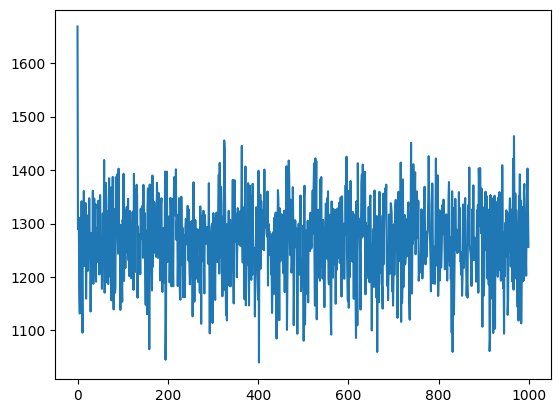

In [42]:
plt.plot(scores)
plt.show()